In [14]:
import numpy as np
import numpy.linalg as linal
import matplotlib.pyplot as plt
import os
import sys

sys.path.append(os.path.join('/home/girish/Documents/pyblish','plots'))
import publish

In [2]:
l2  = 0.12
l3x = 0.50
l3y = 0.85
l4  = 0.74

L2  = np.array([[l2 , 0]]).T
L3x = np.array([[l3x, 0]]).T
L3y = np.array([[0  , l3y]]).T
L4  = np.array([[l4 , 0]]).T

def A(theta):
    return np.array([[np.cos(theta), -np.sin(theta)],\
                     [np.sin(theta),  np.cos(theta)] ])
    
def At(theta) :
    return np.array([[-np.sin(theta), -np.cos(theta)],\
                     [ np.cos(theta), -np.sin(theta)]])

In [3]:
def split_coordinates(q) :
    R2     = q[0:2]
    R3     = q[2:4]
    theta3 = q[4,0]
    R4     = q[5:7]
    theta4 = q[7,0]
    R5     = q[8:10]
    theta5 = q[10,0]
    R6     = q[11:13]
    theta6 = q[13,0]
    theta2 = q[14,0]
    
    return [R2,R3,R4,R5,R6,theta2,theta3,theta4,theta5,theta6]
    

def C(q,t) :
    R2,R3,R4,R5,R6,theta2,theta3,theta4,theta5,theta6 = split_coordinates(q)

    A2 = A(theta2)
    A3 = A(theta3)
    A4 = A(theta4)
    A5 = A(theta5)
    A6 = A(theta6)

    row1 = R2
    row2 = R3+A3@L3y-R2-A2@L2
    row3 = R4-R3
    row4 = R4+A4@L4-np.array([[0.93],[-0.75]])
    row5 = R5-R3-A3@L3x
    row6 = R6-np.array([[0],[0.48]])
    row7 = theta5-theta6
    row8 = A6[:,[1]].T@(R5-R6)
    row9 = theta2 + 31.416*t
    
    return np.row_stack([ row1, row2, row3, row4, row5, row6, row7, row8, row9 ])

def Cq(q):
    I  = np.eye(2)
    Z  = 0*I
    Zv = Z[:,0]
    
    R2,R3,R4,R5,R6,theta2,theta3,theta4,theta5,theta6 = split_coordinates(q)
    
    A2 = At(theta2)@L2
    A3 = At(theta3)
    A4 = At(theta4)@L4
    A6 =  A(theta6)

    A3x = A3@L3x
    A3y = A3@L3y
    A62 = A6[:,[1]].T
    A61 = A6[:,[0]].T
    
    row1 = np.column_stack([ I, Z,  Zv, Z, Zv, Z, Zv, Z, Zv, Zv])
    row2 = np.column_stack([-I, I, A3y, Z, Zv, Z, Zv, Z, Zv,-A2])
    row3 = np.column_stack([ Z,-I,  Zv, I, Zv, Z, Zv, Z, Zv, Zv])
    row4 = np.column_stack([ Z, Z,  Zv, I, A4, Z, Zv, Z, Zv, Zv])
    row5 = np.column_stack([ Z,-I,-A3x, Z, Zv, I, Zv, Z, Zv, Zv])
    row6 = np.column_stack([ Z, Z,  Zv, Z, Zv, Z, Zv, I, Zv, Zv])
    row7 = np.column_stack([ 0, 0, 0, 0, 0, 0, 0, 0,   0, 0,    1, 0, 0, -1, 0])
    row8 = np.column_stack([ 0, 0, 0, 0, 0, 0, 0, 0, A62, 0, -A62, -A61@(R5-R6), 0])
    row9 = np.column_stack([ 0, 0, 0, 0, 0, 0, 0, 0,   0, 0,    0, 0, 0,  0, 1])
    
    return np.row_stack([ row1, row2, row3, row4, row5, row6, row7, row8, row9 ])

def CqQ(q,qd):
    I  = np.eye(2)
    Z  = 0*I
    Zv = Z[:,0]
    Zr1 = np.zeros((1,15))
    Zr2 = np.zeros((2,15))

    R2 ,R3 ,R4 , R5, R6, theta2, theta3, theta4, theta5, theta6 = split_coordinates(q)
    R2d,R3d,R4d,R5d,R6d,theta2d,theta3d,theta4d,theta5d,theta6d = split_coordinates(qd)
    
    A2 = A(theta2)@L2
    A3 = A(theta3)
    A4 = A(theta4)@L4
    A6 = A(theta6)
    
    A3x= A3@L3x
    A3y= A3@L3y
    A62 = A6[:,[1]].T
    A61 = A6[:,[0]].T
    
    row1 = Zr2
    row2 = np.column_stack([ Z, Z, -theta3d*A3y, Z, Zv, Z, Zv, Z, Zv, theta2d*A2])
    row3 = Zr2
    row4 = np.column_stack([ Z, Z, Zv, Z, -theta4d*A4, Z, Zv, Z, Zv, Zv])
    row5 = np.column_stack([ Z, Z,  theta3d*A3x, Z, Zv, Z, Zv, Z, Zv, Zv])
    row6 = Zr2
    row7 = Zr1
    row8 = np.column_stack([ 0, 0, 0, 0, 0, 0, 0, 0, -theta6d*A61, 0, theta6d*A61, -A61@(R5d-R6d)-theta6d*A62@(R5-R6), 0])
    row9 = Zr1
    
    return np.row_stack([ row1, row2, row3, row4, row5, row6, row7, row8, row9 ])

In [4]:
# Initial Coordinates : 
R2 = np.array([[0],[0]])
R3 = np.array([[0.969927],[-0.011077]])
R4 = R3
R5 = np.array([[0.976444],[0.488879]])
R6 = np.array([[0],[0.48]])

theta2 = 0
theta3 = np.deg2rad(89.25325)
theta4 = np.deg2rad(360-93.09298)
theta5 = np.deg2rad(0.521021)
theta6 = theta5

q1 = np.row_stack([R2,R3,theta3,R4,theta4,R5,theta5,R6,theta6,theta2])
q1

array([[ 0.        ],
       [ 0.        ],
       [ 0.969927  ],
       [-0.011077  ],
       [ 1.55776308],
       [ 0.969927  ],
       [-0.011077  ],
       [ 4.6584063 ],
       [ 0.976444  ],
       [ 0.488879  ],
       [ 0.00909353],
       [ 0.        ],
       [ 0.48      ],
       [ 0.00909353],
       [ 0.        ]])

In [11]:
q1   = np.row_stack([R2,R3,theta3,R4,theta4,R5,theta5,R6,theta6,theta2])
time = np.arange(0,0.2,0.001)
Ct   = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,300*2*np.pi/60]]).T
dispEx = []
dispEy = []
velEx  = []
velEy  = []
accEX = []
accEY = []
angularposEF = []
angularvelEF = []
angularaccEF = []

for t in time :

    while True :

        L = Cq(q1)
        R = -C(q1,t)

        dq1 = linal.inv(L)@R
        q1 = q1 + dq1
        if ( np.abs(dq1) < 1e-5 ).all() :
            break
    
    dispEx.append(q1[8,0])
    dispEy.append(q1[9,0])
    angularposEF.append(q1[10,0])

    # Velocity 
    q2 = -linal.inv(Cq(q1))@Ct 

    velEx.append(q2[8,0])
    velEy.append(q2[9,0]) 
    angularvelEF.append(q2[10,0])
    
    # Acceleration
    q2_dot = -linal.inv(Cq(q1))@CqQ(q1,q2)@q2

    accEX.append(q2_dot[8,0])
    accEY.append(q2_dot[9,0])
    angularaccEF.append(q2_dot[13,0])

In [15]:
plt.plot(time,dispEx)
plt.plot(time,dispEy)

Error in callback <function _draw_all_if_interactive at 0x7fdc964b0e00> (for post_execute):


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 600x461.538 with 1 Axes>

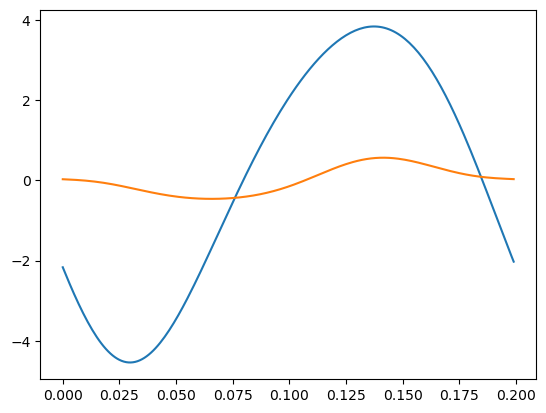

In [9]:
plt.plot(time,velEx)
plt.plot(time,velEy)

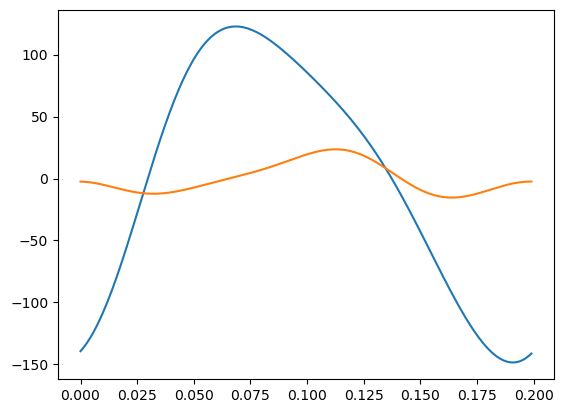

In [10]:
plt.plot(time,accEX)
plt.plot(time,accEY)

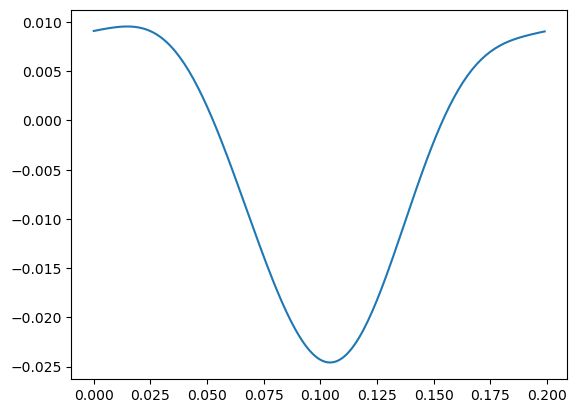

In [12]:
plt.plot(time,angularposEF)

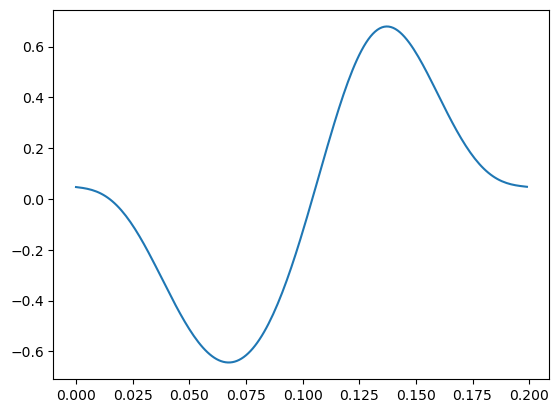

In [7]:
plt.plot(time,angularvelEF)

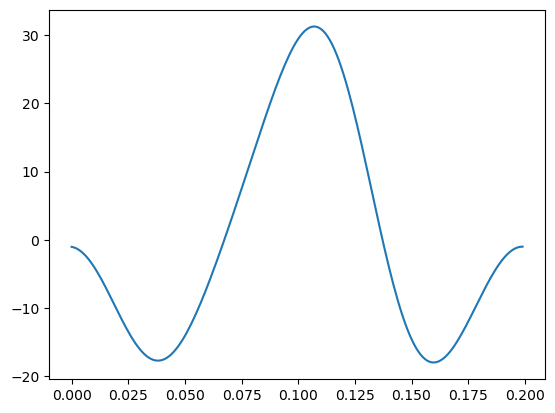

In [ ]:
plt.plot(time,angularaccEF)